In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [62]:
# Find the most recent date in the data set.
# first_row = session.query(measurement).first()
# print(first_row)
# first_row.__dict__
# for row in session.query(measurement.date).order_by(measurement.date.desc()).limit(15):
#     print(row)
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

In [27]:
first_row = session.query(measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7ff4519b8040>,
 'tobs': 65.0,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1,
 'date': '2010-01-01'}

ValueError: Could not convert object to NumPy datetime

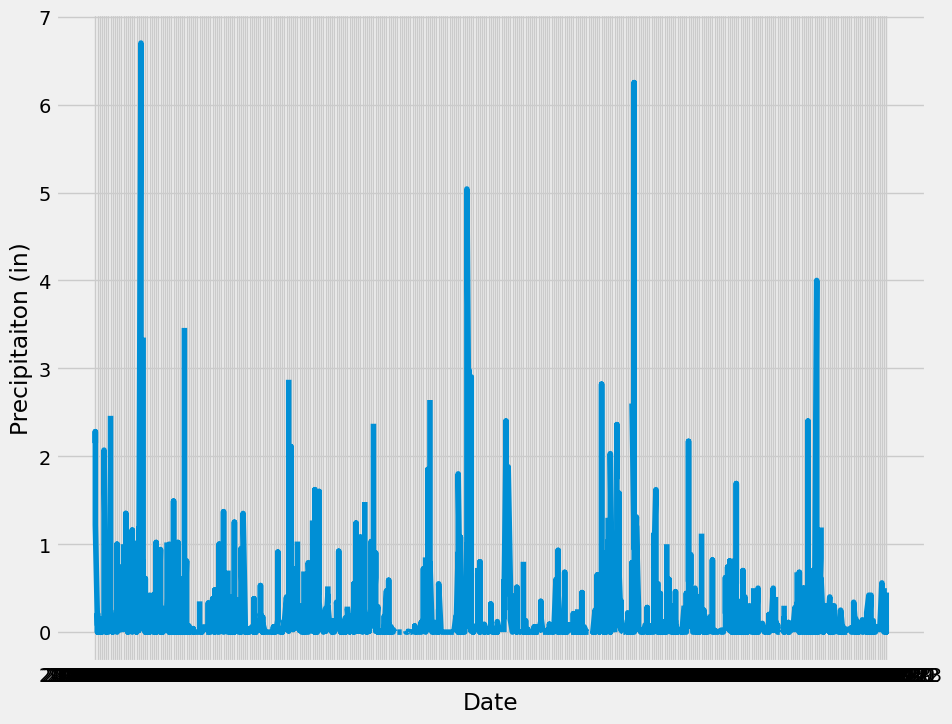

In [64]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
session.query(measurement.date).order_by(measurement.date.desc()).first()
# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# print(one_year) #2016-08-23

# Perform a query to retrieve the data and precipitation scores
one_year_query = session.query(measurement.date, measurement.prcp).filter(measurement.date > one_year).all()
# one_year_query

# Save the query results as a Pandas DataFrame and set the index to the date column
one_year_df = pd.DataFrame(one_year_query)
one_year_df = one_year_df.set_index("date")
# one_year_df.head()

# Sort the dataframe by date
one_year_sorted = one_year_df.sort_index()
# one_year_sorted.head()

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10,8))
plt.plot(one_year_sorted)
plt.xlabel('Date')
plt.ylabel('Precipitaiton (in)')
plt.xticks(np.arange(one_year, last_date, 30))




In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()